<a href="https://colab.research.google.com/github/SRC-07/EstructuraDeDatos_SANTIAGOROJASCARDENAS/blob/main/Taller_1_Corte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Santiago Rojas Cardenas ID: 927171 santiago.rojas-c@uniminuto.edu.co

Estructura de Datos NRC: 69131

Taller 1 Corte 3


Matriz de adyacencia:
[[  0 415 170   0   0   0   0 310   0   0   0]
 [415   0 190 180 300   0   0   0   0   0   0]
 [170 190   0 230   0   0   0   0   0   0   0]
 [  0 180 230   0 275 198   0 180   0   0 180]
 [  0 300   0 275   0 225   0   0   0   0   0]
 [  0   0   0 198 225   0 267   0   0   0   0]
 [  0   0   0   0   0 267   0   0 312 450   0]
 [310   0   0 180   0   0   0   0 230   0 345]
 [  0   0   0   0   0   0 312 230   0 450   0]
 [  0   0   0   0   0   0 450   0 450   0   0]
 [  0   0   0 180   0   0   0 345   0   0   0]]

Matriz de incidencia:
[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]]

Camino

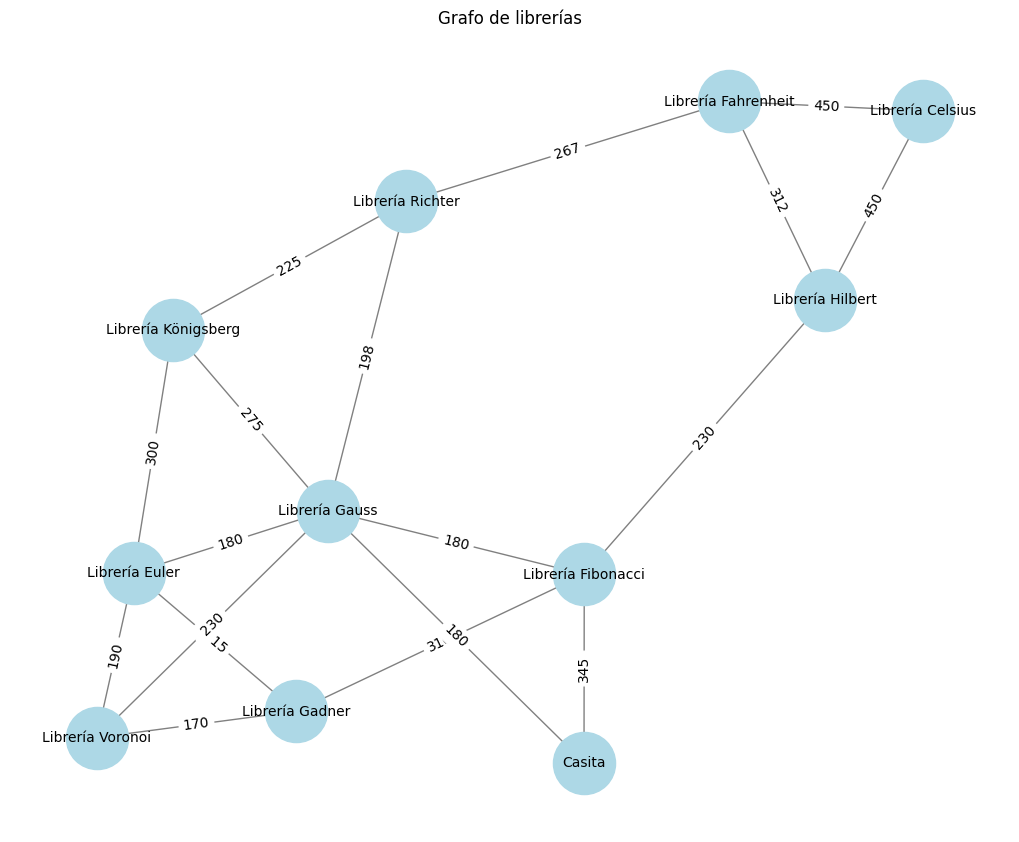

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Definición de las librerías (nodos) y las distancias (aristas)
librerias = [
    "Librería Gadner", "Librería Euler", "Librería Voronoi", "Librería Gauss",
    "Librería Königsberg", "Librería Richter", "Librería Fahrenheit",
    "Librería Fibonacci", "Librería Hilbert", "Librería Celsius", "Casita"
]

aristas = {
    ("Librería Gadner", "Librería Euler"): 415,
    ("Librería Gadner", "Librería Voronoi"): 170,
    ("Librería Gadner", "Librería Fibonacci"): 310,
    ("Librería Euler", "Librería Voronoi"): 190,
    ("Librería Euler", "Librería Gauss"): 180,
    ("Librería Euler", "Librería Königsberg"): 300,
    ("Librería Voronoi", "Librería Gauss"): 230,
    ("Librería Gauss", "Librería Königsberg"): 275,
    ("Librería Gauss", "Librería Richter"): 198,
    ("Librería Gauss", "Casita"): 180,
    ("Librería Königsberg", "Librería Richter"): 225,
    ("Librería Richter", "Librería Fahrenheit"): 267,
    ("Librería Fahrenheit", "Librería Celsius"): 450,
    ("Librería Fahrenheit", "Librería Hilbert"): 312,
    ("Librería Fibonacci", "Casita"): 345,
    ("Librería Fibonacci", "Librería Hilbert"): 230,
    ("Librería Fibonacci", "Librería Gauss"): 180,
    ("Librería Hilbert", "Librería Celsius"): 450
}

# Matriz de adyacencia
num_nodos = len(librerias)
adj_matrix = np.zeros((num_nodos, num_nodos), dtype=int)

for (nodo1, nodo2), distancia in aristas.items():
    i, j = librerias.index(nodo1), librerias.index(nodo2)
    adj_matrix[i][j] = distancia
    adj_matrix[j][i] = distancia  # Grafo no dirigido

print("Matriz de adyacencia:")
print(adj_matrix)

# Matriz de incidencia
num_aristas = len(aristas)
inc_matrix = np.zeros((num_nodos, num_aristas), dtype=int)

for idx, ((nodo1, nodo2), _) in enumerate(aristas.items()):
    i, j = librerias.index(nodo1), librerias.index(nodo2)
    inc_matrix[i][idx] = 1
    inc_matrix[j][idx] = 1

print("\nMatriz de incidencia:")
print(inc_matrix)

# Crear el grafo para encontrar el camino más corto
G = nx.Graph()
for (nodo1, nodo2), distancia in aristas.items():
    G.add_edge(nodo1, nodo2, weight=distancia)

# Camino más corto de Casita a Librería Celsius
inicio = "Casita"
fin = "Librería Celsius"
camino_mas_corto = nx.shortest_path(G, source=inicio, target=fin, weight="weight")
distancia_mas_corta = nx.shortest_path_length(G, source=inicio, target=fin, weight="weight")

print(f"\nCamino más corto de {inicio} a {fin}: {camino_mas_corto}")
print(f"Distancia más corta de {inicio} a {fin}: {distancia_mas_corta}")

# Grafica del grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d for (u, v, d) in G.edges(data="weight")})
plt.title("Grafo de librerías")
plt.show()
